<a href="https://colab.research.google.com/github/Taddy25/HousePricePrediction/blob/main/DSProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

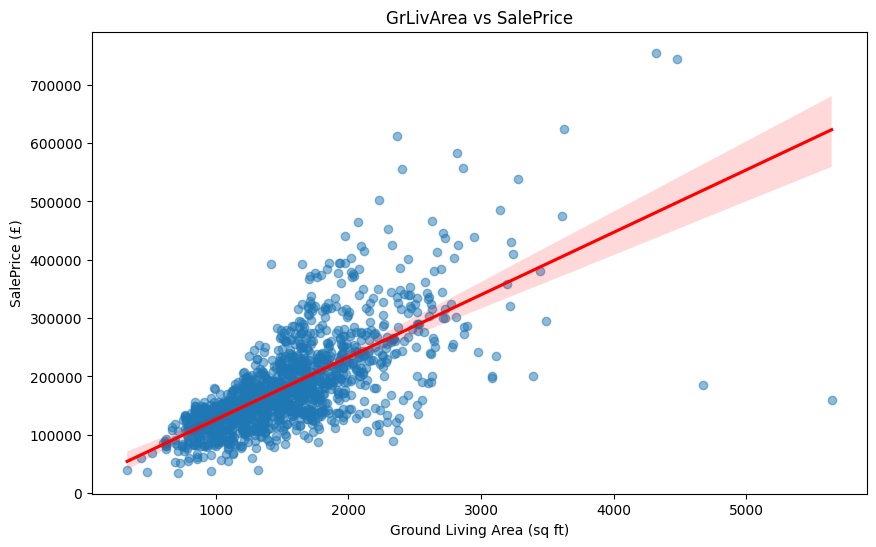

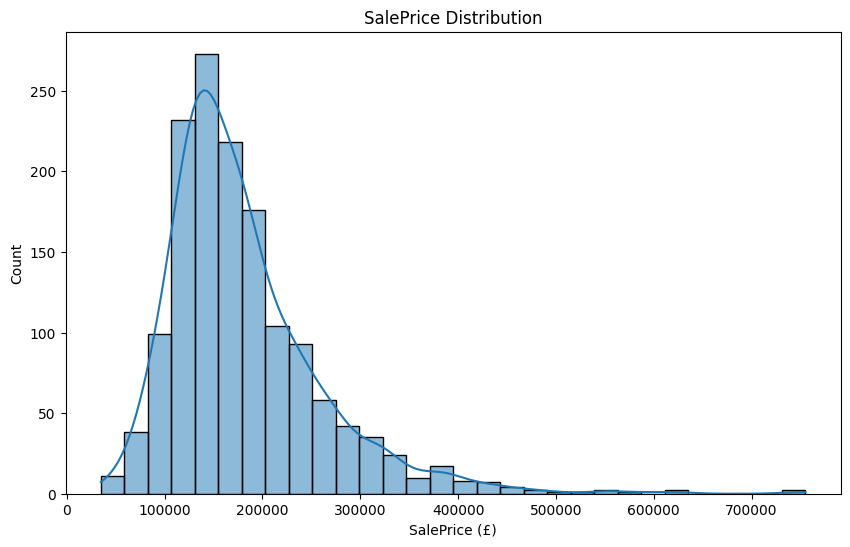

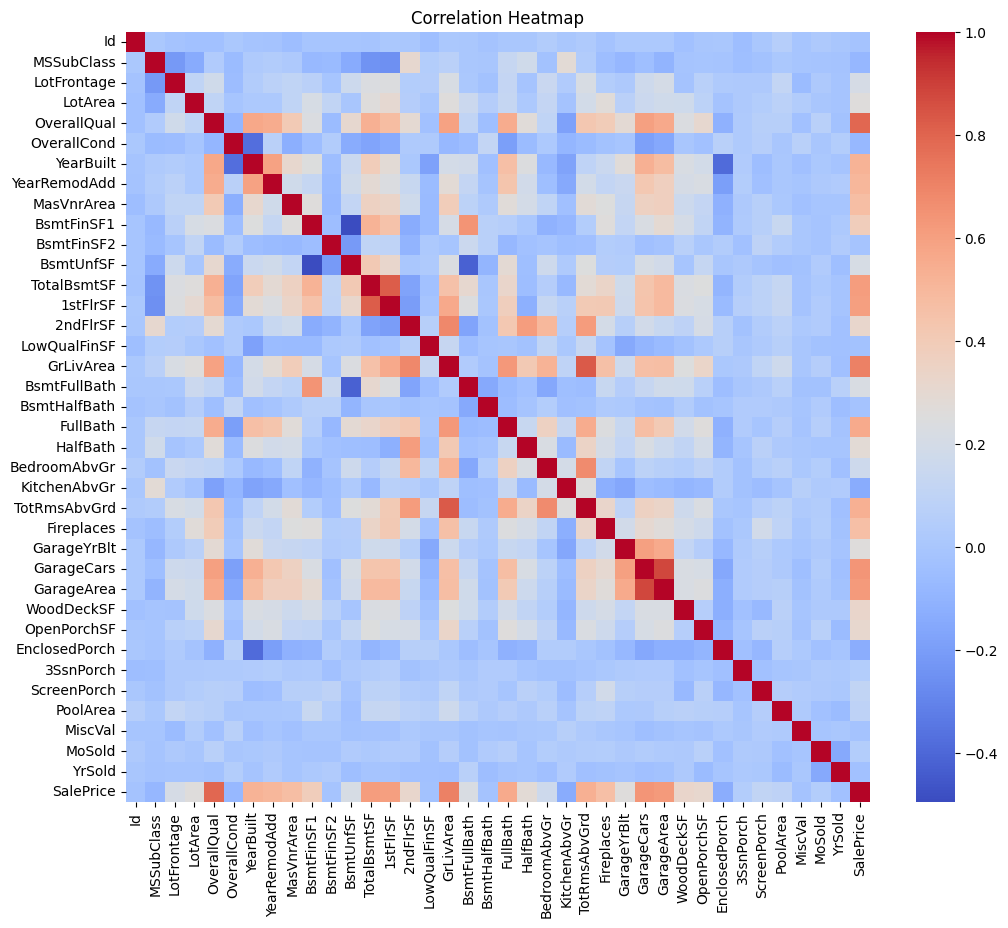

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
Name: SalePrice, dtype: float64
Mean Squared Error: 1851765974.97
Root Mean Squared Error: 43032.15
      Actual      Predicted
892   154500  139105.720944
1105  325000  288283.257433
413   115000  132683.550804
522   159000  189493.369881
1036  315500  289972.245056
614    75500   42635.196145
218   311500  229962.126193
1160  146000  179669.840820
649    84500   42635.196145
887   135500  127682.495267


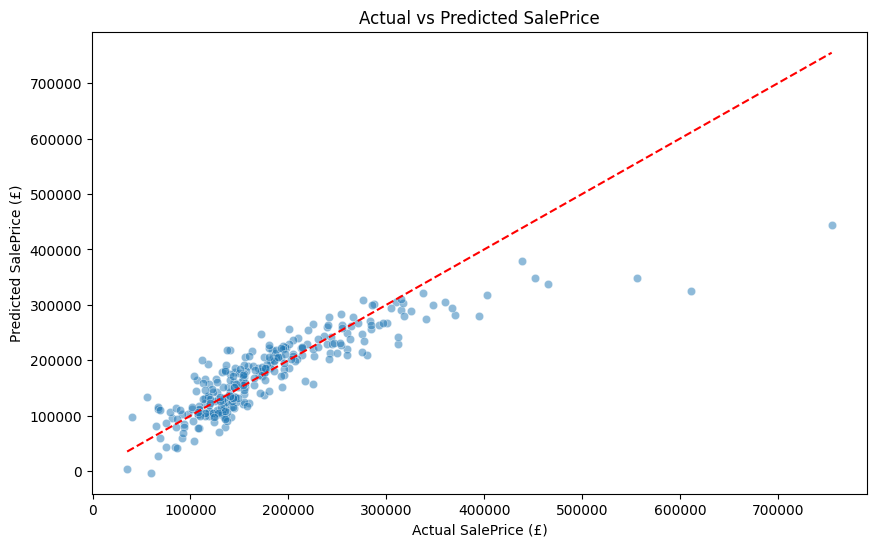

GrLivArea and OverallQual are strong predictors of SalePrice.
GarageCars has a smaller but positive effect.
Linear regression gives a basic predictive model; more features or advanced models could improve accuracy.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load dataset
file_path = '/content/drive/MyDrive/DS Project/train.csv'
df = pd.read_csv(file_path)

# Clean columns and fill missing values
df.columns = df.columns.str.strip()
df = df.fillna(0)

# Quick data overview
print(df.info())
print(df.describe())

# Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('SalePrice (£)')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice (£)')
plt.show()

numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature selection
features = ['GrLivArea', 'OverallQual', 'GarageCars']
X = df[features]
y = df['SalePrice']

print(X.join(y).corr()['SalePrice'].sort_values(ascending=False))

# Train/test split and linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted SalePrice')
plt.xlabel('Actual SalePrice (£)')
plt.ylabel('Predicted SalePrice (£)')
plt.show()

# Key insights
print("GrLivArea and OverallQual are strong predictors of SalePrice.")
print("GarageCars has a smaller but positive effect.")
print("Linear regression gives a basic predictive model; more features or advanced models could improve accuracy.")
